# 1. Data Preprocessing
Dataset yang digunakan berasal dari kaggle.com yaitu https://www.kaggle.com/uciml/pima-indians-diabetes-database. Variabel yang digunakan adalah

- Pregnancies : Number of times pregnant
- Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure : Diastolic blood pressure (mm Hg)
- SkinThickness :Triceps skin fold thickness (mm)
- Insulin : 2-Hour serum insulin (mu U/ml)
- BMI : Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction : Diabetes pedigree function
- Age : Age (years)
- Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [20]:
## Load Package
library(caret)
library(rpart.plot)
library(dplyr)
library(caTools)

## 1. Data Preparation

In [10]:
loc = '/home/jovyan/work/github/Artificial-Intelligence/Supervised Learning/Decision Tree/CART/Diabetes.csv'
df = read.csv(loc)

In [13]:
head(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [15]:
summary(df)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [17]:
str(df)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


## 1.2 Split datasets

In [22]:
# membuat kolom baru yaitu status
df$status <- sample.split(df[,9],SplitRatio = 0.80) 

In [23]:
df$Outcome <- as.factor(df$Outcome)

In [24]:
df_train = subset(df,status==TRUE) # label TRUE = data train
df_test = subset(df,status==FALSE) # label FALSE = data test

In [25]:
head(df_train)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,status
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<fct>,<lgl>
1,6,148,72,35,0,33.6,0.627,50,1,TRUE
2,1,85,66,29,0,26.6,0.351,31,0,TRUE
4,1,89,66,23,94,28.1,0.167,21,0,TRUE
8,10,115,0,0,0,35.3,0.134,29,0,TRUE
10,8,125,96,0,0,0.0,0.232,54,1,TRUE
12,10,168,74,0,0,38.0,0.537,34,1,TRUE


In [26]:
kolom_X = c('Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age')
kolom_y = c('Outcome')

In [27]:
X_train = df_train[,kolom_X]
X_test = df_test[,kolom_X]
y_train = df_train[,kolom_y]
y_test = df_test[,kolom_y]

## 2. Modeling

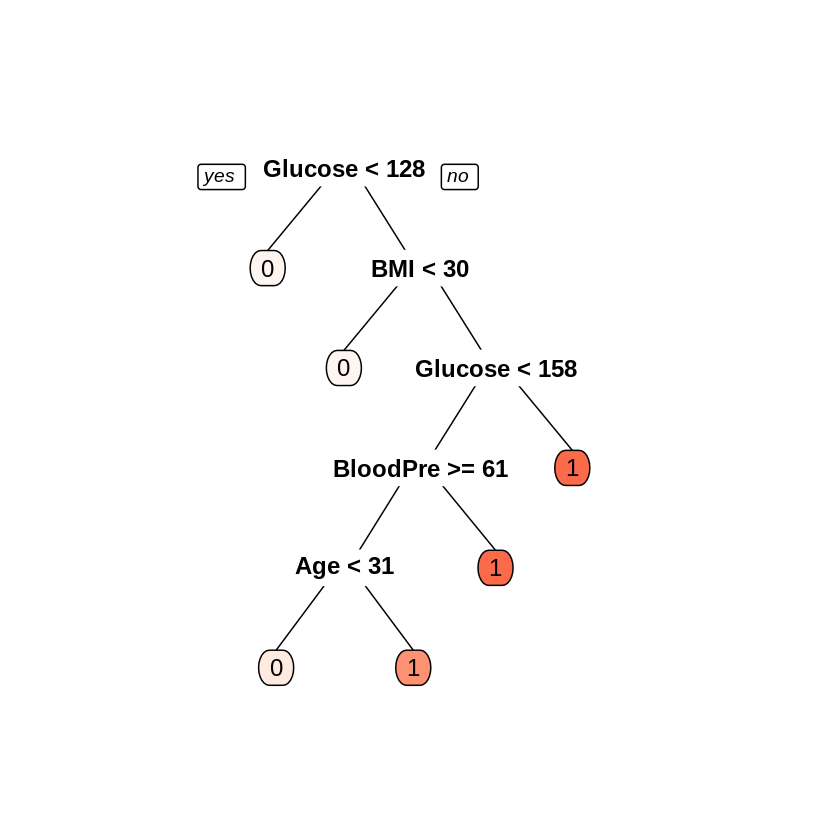

In [29]:
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
set.seed(3333)
dtree_fit_info <- train(Outcome ~., data = df, method = "rpart",
                parms = list(split = "information"),
                trControl=trctrl,
                tuneLength = 10)

prp(dtree_fit_info$finalModel, box.palette="Reds", tweak=1.2)

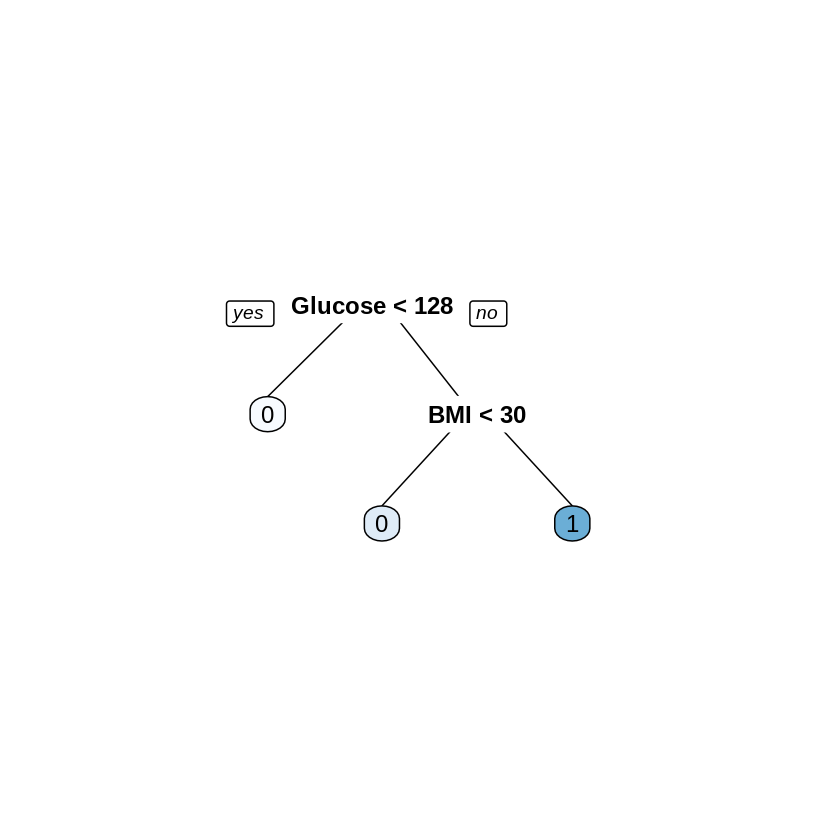

In [30]:
set.seed(3333)
 dtree_fit_gini <- train(Outcome ~., data = df, method = "rpart",
                         parms = list(split = "gini"),
                         trControl=trctrl,
                         tuneLength = 10)
 prp(dtree_fit_gini$finalModel,box.palette = "Blues", tweak = 1.2)

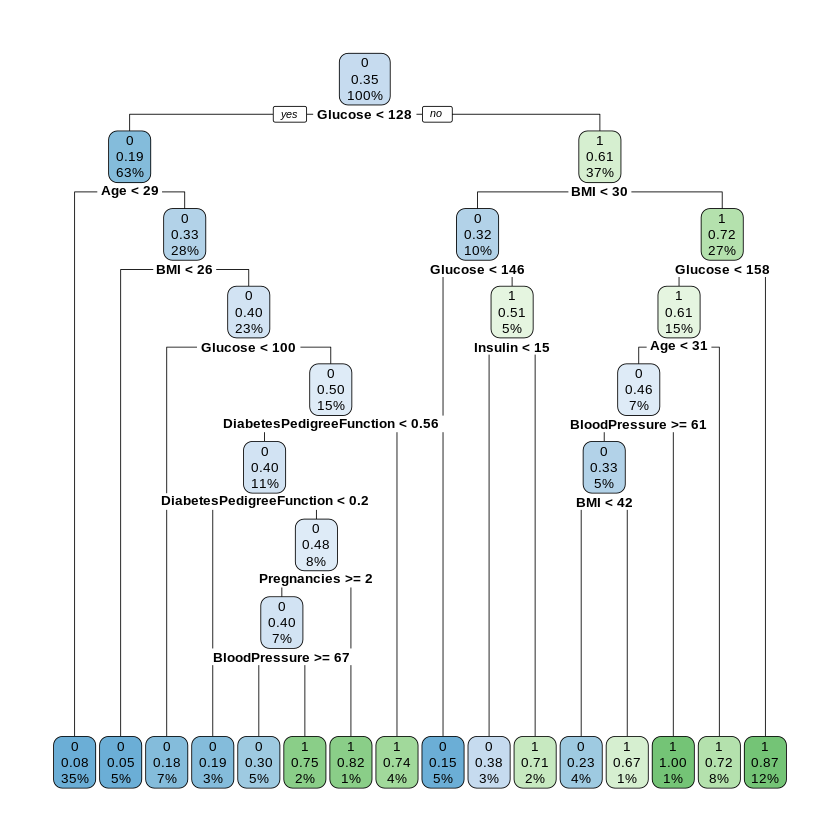

In [31]:
library(rpart)
library(rpart.plot)
tress<-rpart(Outcome ~., data = df, method = 'class' )                  
rpart.plot(tress)

# Reference
- https://rpubs.com/Ardila/C45
- https://www.gormanalysis.com/blog/decision-trees-in-r-using-rpart/